# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Antonius Kustiono Putra
- **Email:** m320b4ky0593@bangkit.academy
- **ID Dicoding:** antoniuskp

## Menentukan Pertanyaan Bisnis

- Seberapa sering pelanggan melakukan pemesanan pada E-Commerce dalam beberapa bulan terakhir?
- Bagaimana Demografi Pelanggan yang dimiliki oleh E-Commerce berdasarkan city dan states?

## Import Semua Packages/Library yang Digunakan

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [79]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [80]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [81]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- Dataset Order berhasil dibuka dan di set dengan nama orders_df sebagai dataframe
- Dataset Customers berhasil dibuka dan di set dengan nama customers_df sebagai dataframe
- Dataset Order Items berhasil dibuka dan di set dengan nama order_items_df sebagai dataframe

### Assessing Data

In [82]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [83]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [84]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [85]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [86]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [87]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [88]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [89]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [90]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [91]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [92]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [93]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Pada tahap ini, terdapat keanehan pada tipe data di order_df yang seharusnya datetime, tetapi menjadi object. Selain itu tidak ada keanehan lain seperti duplikasi data, dan sebagainya
- di customers_df dan order_items_df tidak ada keanehan seperti tipe data yang salah, duplikasi data, dan sebagainya

### Cleaning Data

In [94]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [95]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- tipe data pada orders_df telah berhasil dibenarkan dari object menjadi datetime
- dikarenakan tidak ada keanehan pada customers_df dan order_items_df, maka tidak perlu dilakukan cleaning

## Exploratory Data Analysis (EDA)

### Explore Data Orders

In [96]:
wait_approved = orders_df["order_approved_at"] - orders_df["order_purchase_timestamp"]
wait_approved = wait_approved.apply(lambda x: x.total_seconds())
orders_df["wait_approved"] = round(wait_approved/86400)

In [97]:
estimated_time = orders_df["order_estimated_delivery_date"] - orders_df["order_delivered_carrier_date"]
estimated_time = estimated_time.apply(lambda x: x.total_seconds())
orders_df["estimated_time"] = round(estimated_time/86400)

In [98]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [99]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,wait_approved,estimated_time,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,99281.000000,97658.000000,96475.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,0.427272,20.361373,9.292314
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,0.000000,-100.000000,-16.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,0.000000,15.000000,4.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,0.000000,20.000000,7.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,1.000000,26.000000,12.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,188.000000,192.000000,205.000000


In [100]:
orders_bulanan_df =  orders_df.resample(rule="M", on='order_purchase_timestamp').agg({
    "customer_id": "nunique"
})
orders_bulanan_df.index = orders_bulanan_df.index.strftime('%Y-%B')
orders_bulanan_df = orders_bulanan_df['customer_id'].sort_values(ascending=False)
print(orders_bulanan_df)

order_purchase_timestamp
2017-November     7544
2018-January      7269
2018-March        7211
2018-April        6939
2018-May          6873
2018-February     6728
2018-August       6512
2018-July         6292
2018-June         6167
2017-December     5673
2017-October      4631
2017-August       4331
2017-September    4285
2017-July         4026
2017-May          3700
2017-June         3245
2017-March        2682
2017-April        2404
2017-February     1780
2017-January       800
2016-October       324
2018-September      16
2016-September       4
2018-October         4
2016-December        1
2016-November        0
Name: customer_id, dtype: int64


<ipython-input-100-e7471d0be9d1>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_bulanan_df =  orders_df.resample(rule="M", on='order_purchase_timestamp').agg({


In [101]:
orders_tahunan_df =  orders_df.resample(rule="Y", on='order_purchase_timestamp').agg({
    "customer_id": "nunique"
})
orders_tahunan_df.index = orders_tahunan_df.index.strftime('%Y')
orders_tahunan_df = orders_tahunan_df['customer_id'].sort_values(ascending=False)
print(orders_tahunan_df)

<ipython-input-101-2c5f5ff5bb5f>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  orders_tahunan_df =  orders_df.resample(rule="Y", on='order_purchase_timestamp').agg({


order_purchase_timestamp
2018    54011
2017    45101
2016      329
Name: customer_id, dtype: int64


**Insight:**
- Dikarenakan Orders banyak menyimpan data tanggal-tanggal, maka dapat dihitung beberapa perhitungan mulai dari delivery_time, wait_approved, estimated_time, jumlah orders bulanan, hingga jumlah orders tahunan
- Dari perhitungan-perhitungan tersebut, kita dapat melihat mean, min, dan max masing-masing perhitungan tersebut. Terdapat keanehan dalam data min dimana nilai ke tiga perhitungan bernilai minus, sehingga terdapat kesalahan yang mungkin terjadi yaitu pengiriman telah sampai sebelum dikirim (kesalahan input data). Dari perhitungan jumlah order bulanan terbanyak adalah pada November 2017, dan dari perhitungan jumlah order tahunan terbanyak adalah pada 2018 sehingga dapat disimpulkan jumlah orderan cenderung meningkat dari tahun ke tahun

### Explore Data Customers

In [102]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [103]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- Dikarenakan Customers banyak menyimpan data alamat, maka dapat dilakukan perhitungan persebaran jumlah customer berdasarkan city dan state
- Berdasarkan perhitungan, dapat disimpulkan bahwa persebaran customer pada setiap city tidak merata dimana didominasi oleh customer dari kota sao paulo; begitu pula dengan persebaran customer pada setiap state juga tidak merata dimana didominasi oleh customer dari state SP

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-104-eb908e653347>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_bulanan_df = orders_df.resample(rule="M", on='order_purchase_timestamp').agg({


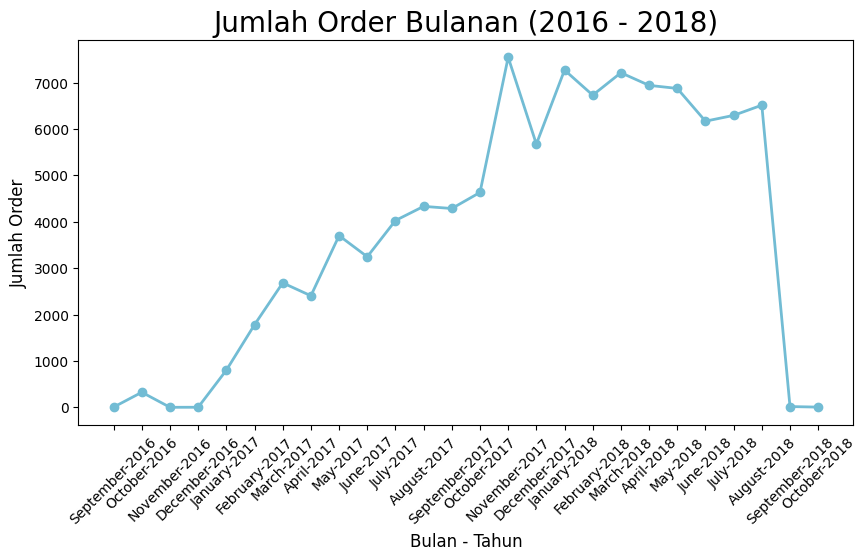

In [104]:
orders_bulanan_df = orders_df.resample(rule="M", on='order_purchase_timestamp').agg({
    "order_id": "nunique"
})
orders_bulanan_df.index = orders_bulanan_df.index.strftime('%B-%Y')
orders_bulanan_df = orders_bulanan_df.reset_index()
orders_bulanan_df.rename(columns={
    "order_id": "order_count",
    "order_purchase_timestamp": "month_year"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(orders_bulanan_df["month_year"], orders_bulanan_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Jumlah Order Bulanan (2016 - 2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel('Bulan - Tahun', fontsize=12)
plt.ylabel('Jumlah Order', fontsize=12)
plt.show()

<ipython-input-105-fd7c4f04b1bb>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_bulanan_df = orders_df.resample(rule="M", on='order_purchase_timestamp').agg({


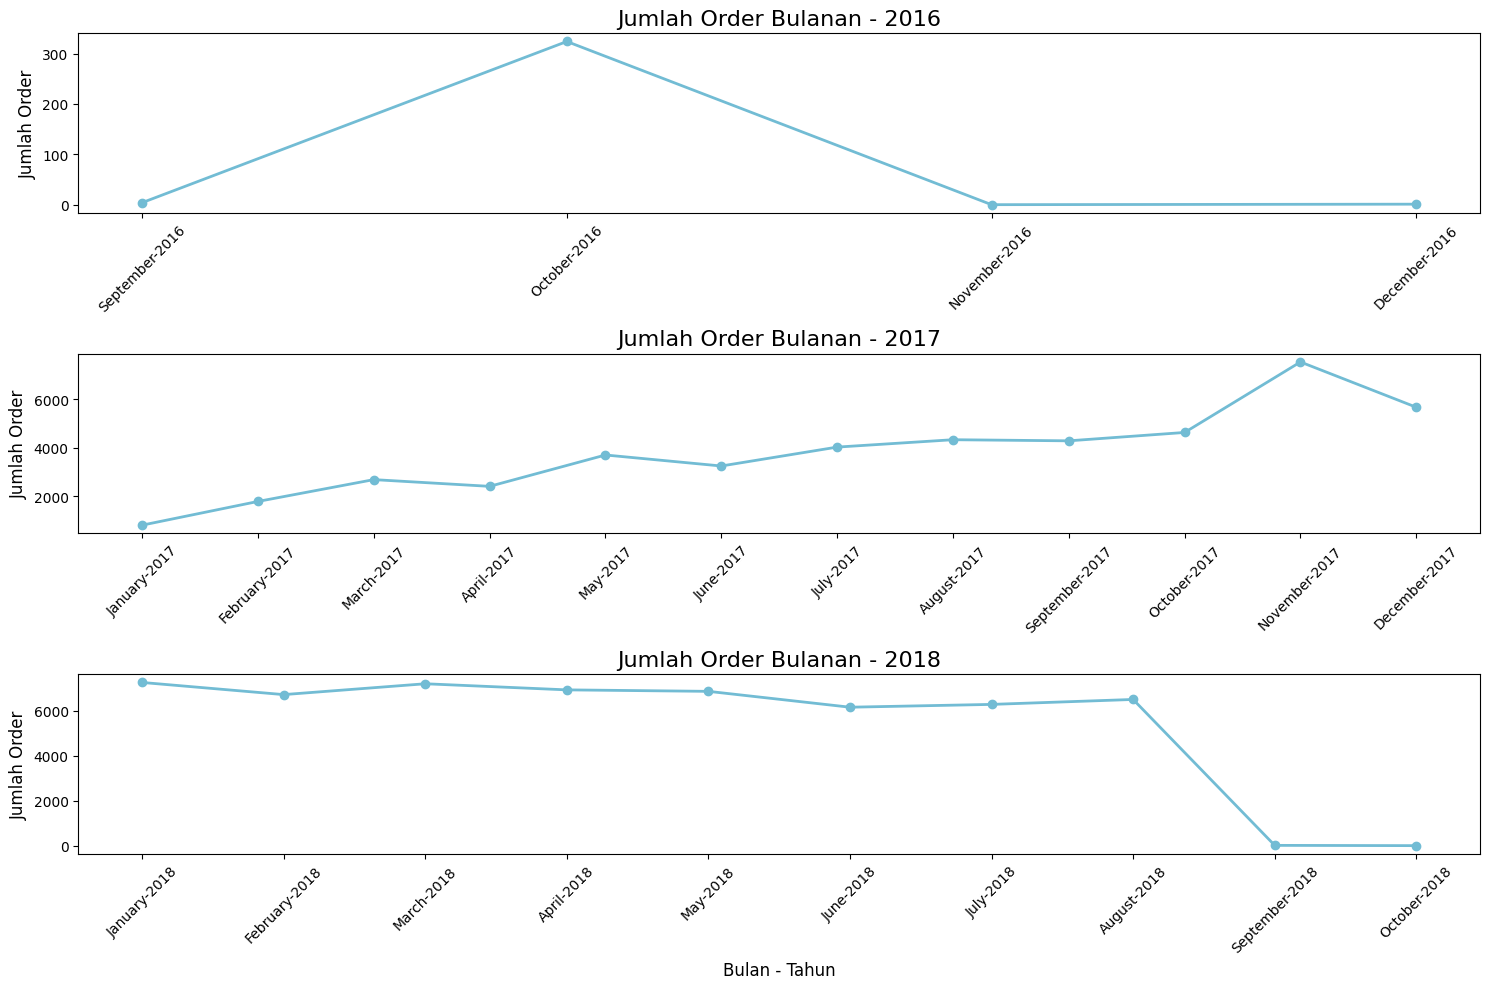

In [105]:
orders_bulanan_df = orders_df.resample(rule="M", on='order_purchase_timestamp').agg({
    "order_id": "nunique"
})

orders_bulanan_df.index = orders_bulanan_df.index.strftime('%B-%Y')
orders_bulanan_df = orders_bulanan_df.reset_index()

orders_bulanan_df.rename(columns={
    "order_id": "order_count",
    "order_purchase_timestamp": "month_year"
}, inplace=True)

df_2016 = orders_bulanan_df[orders_bulanan_df['month_year'].str.contains("2016")]
df_2017 = orders_bulanan_df[orders_bulanan_df['month_year'].str.contains("2017")]
df_2018 = orders_bulanan_df[orders_bulanan_df['month_year'].str.contains("2018")]

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(df_2016["month_year"], df_2016["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Jumlah Order Bulanan - 2016", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.ylabel('Jumlah Order', fontsize=12)

plt.subplot(3, 1, 2)
plt.plot(df_2017["month_year"], df_2017["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Jumlah Order Bulanan - 2017", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.ylabel('Jumlah Order', fontsize=12)

plt.subplot(3, 1, 3)
plt.plot(df_2018["month_year"], df_2018["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Jumlah Order Bulanan - 2018", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel('Bulan - Tahun', fontsize=12)
plt.ylabel('Jumlah Order', fontsize=12)

plt.tight_layout()
plt.show()

### Pertanyaan 2:

<ipython-input-106-a9f48bfb6dce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-106-a9f48bfb6dce>:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/loca

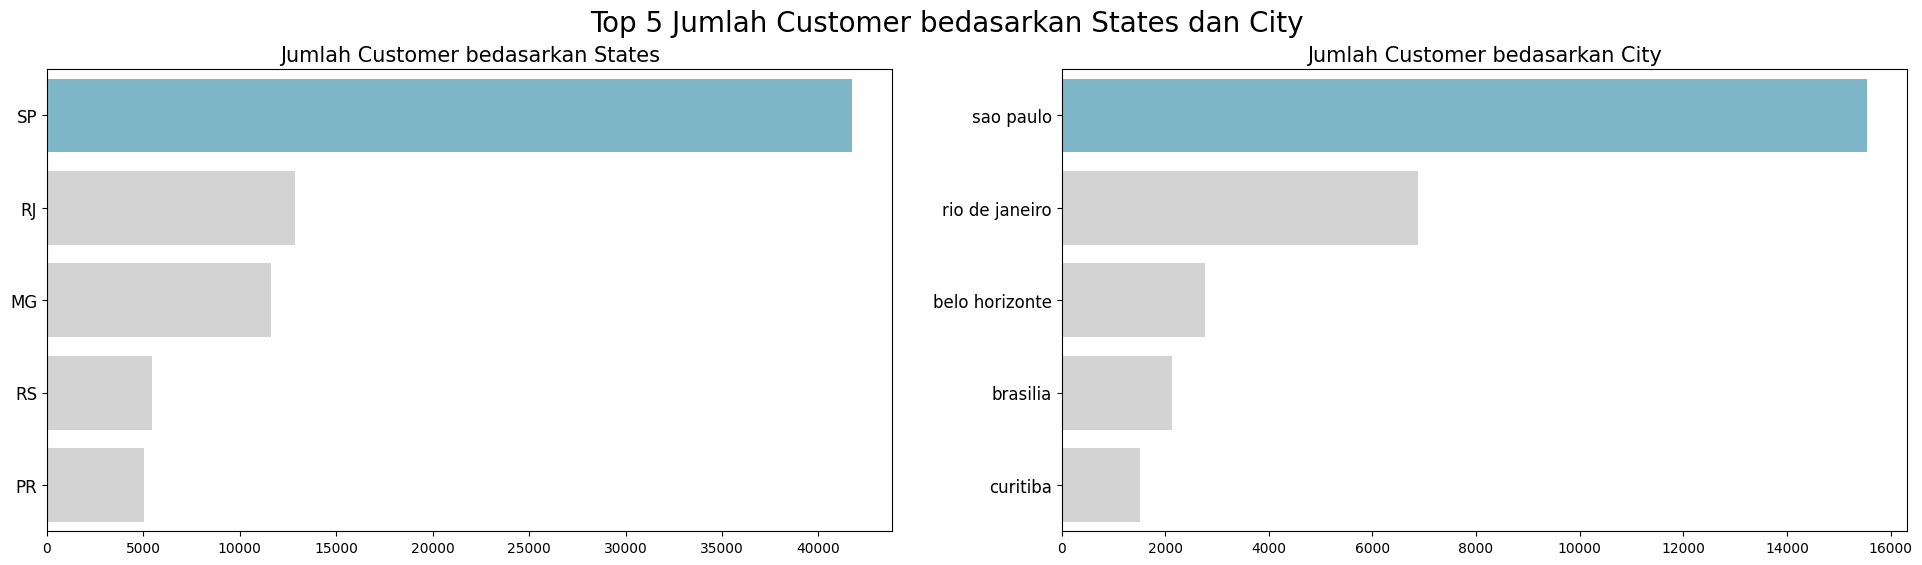

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

bystate_df = customers_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bycity_df = customers_df.groupby(by="customer_city").customer_id.nunique().reset_index()

sns.barplot(
    x="customer_id",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_id", ascending=False).head(5),
    palette=colors,
    ax = ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Jumlah Customer bedasarkan States", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(
    x="customer_id",
    y="customer_city",
    data=bycity_df.sort_values(by="customer_id", ascending=False).head(5),
    palette=colors,
    ax = ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Jumlah Customer bedasarkan City", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Top 5 Jumlah Customer bedasarkan States dan City", fontsize=20)
plt.show()

**Insight:**
- Pada pertanyaan 1, plot ditampilkan sebanyak 2 kali yaitu plot jumlah order keseluruhan bulan dari tahun 2016 hingga 2018 dan plot yang menampilkan berdasarkan bulan dari setiap tahunnya. Plot pertama dimaksudkan untuk menganalisis penaikan dan penurunan jumlah order secara menyeluruh. Sementara plot kedua dimaksudkan menganalisis penaikan dan penurunan jumlah order secara detail pada setiap tahunnya.
- Pada pertanyaan 2, plot langsung ditampilkan berdampingan antara jumlah customer berdasarkan states dan jumlah customer berdasarkan city yang diurutkan secara menurun. Kedua plot ini dimaksudkan untuk menganalisis jumlah customer berdasarkan demografi pelanggan khususnya states dan city.

## Analisis Lanjutan (Opsional)

In [107]:
gabungan_df = pd.merge(
    left = order_items_df,
    right = orders_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
gabungan_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,wait_approved,estimated_time,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,0.0,9.0,1.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,0.0,10.0,8.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,0.0,19.0,6.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,0.0,9.0,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,0.0,29.0,13.0


In [108]:
gabungan_df = pd.merge(
    left = gabungan_df,
    right = customers_df,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)
gabungan_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,wait_approved,estimated_time,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,0.0,9.0,1.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,0.0,10.0,8.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,0.0,19.0,6.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,0.0,9.0,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,0.0,29.0,13.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [109]:
print(gabungan_df.isnull().sum())

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
wait_approved                      15
estimated_time                   1194
delivery_time                    2455
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64


In [110]:
gabungan_df.groupby(by=["customer_state"]).agg({
    "price": "sum"
})

,price
customer_state,
AC,15982.95
AL,80314.81
AM,22356.84
AP,13474.30
BA,511349.99
CE,227254.71
DF,302603.94
ES,275037.31
GO,294591.95


In [111]:
rfm_df = gabungan_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


<ipython-input-112-ccb4513e2722>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packa

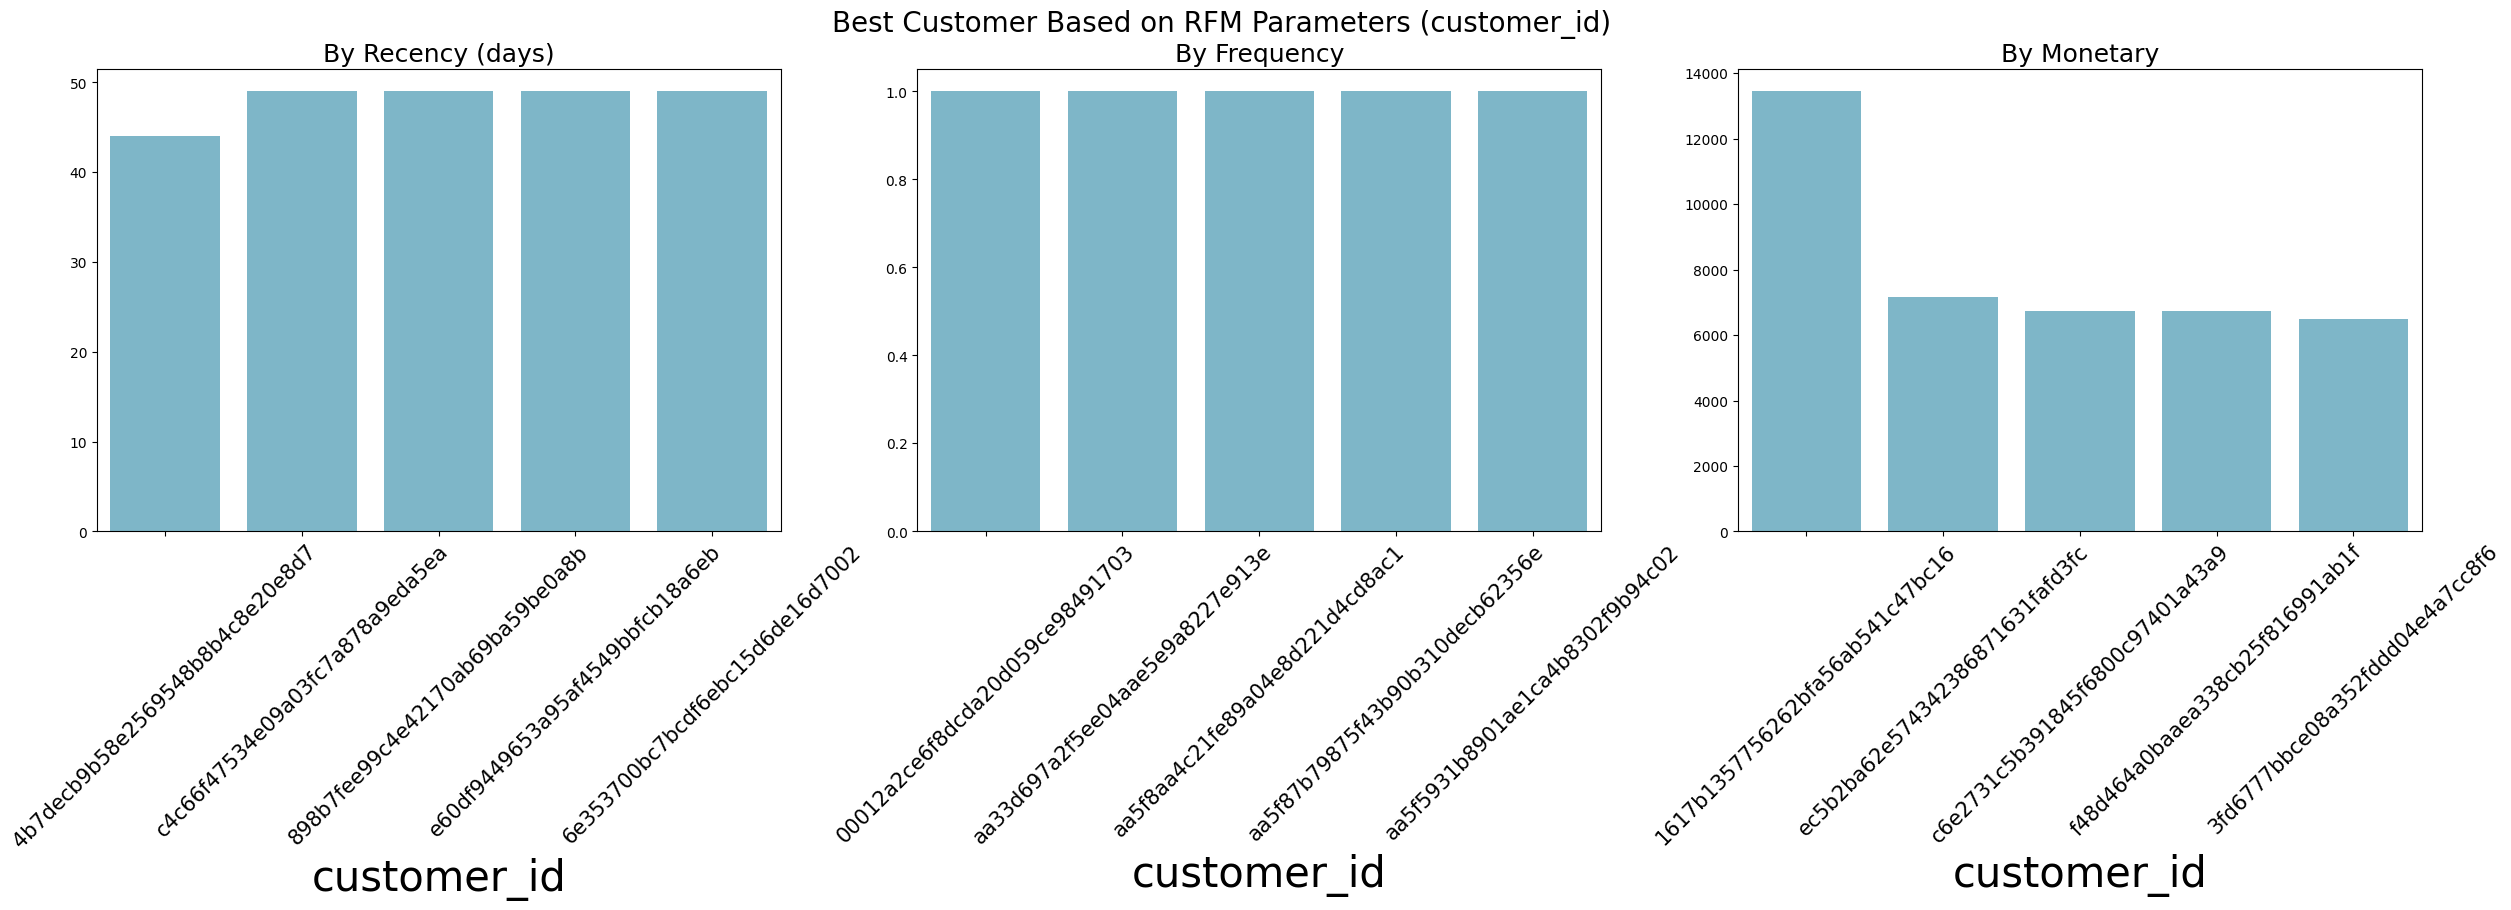

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_xlabel("customer_id", fontsize=30)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, fontsize=12)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_xlabel("customer_id", fontsize=30)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=12)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_xlabel("customer_id", fontsize=30)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, fontsize=12)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**
- Pada analisis lanjutan, pengelompokkan pelanggan ke dalam beberapa kategori dilakukan berdasarkan tiga parameter, yaitu recency, frequency, dan monetary. Recency, parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi. Frequency, parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi. Monetary, parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.
- Penggabungan dataframe dilakukan sebanyak 2 kali yaitu orders_df - order_items_df. Lalu digabungkan kembali dengan customers_df. rfm_df adalah dataframe yang digunakan untuk menampung informasi terkait 3 paramater yang hendak dihitung. Setelah itu dapat dihasilkan sebuah plot yang menunjukkan customer terbaik berdasarkan parameter frequency, monetary, dan recancy menggunakan kode berikut.

## Conclusion

- Seberapa sering pelanggan melakukan pemesanan pada E-Commerce dalam beberapa bulan terakhir? Berdasarkan hasil, jumlah pesanan pelanggan pada E-Commerce cenderung meningkat dari tahun 2016 hingga november 2017, lalu disusul penurunan order dan cenderung stabil hingga agustus 2018 mengalami penurunan yang sangat signifikan.

- Bagaimana Demografi Pelanggan yang dimiliki oleh E-Commerce berdasarkan city dan states? Bedasarkan hasil, demografi pelanggan berdasarkan city didominasi oleh pelanggan yang berasa dari city sao paulo. Lalu untuk demografi pelanggan berdasarkan states didominasi oleh pelanggan dari states SP.